# Understanding Cicles in the Brazilian Stock Market

In [1]:
import MetaTrader5 as mt5
import pandas as pd

In [2]:
import yfinance as yf

# Definir o ticker da PETR4 (Petrobras PN)
ticker = "PETR4.SA"  # .SA é usado para ações da B3

# Baixar os dados históricos
df = yf.download(ticker, start="2000-01-01", end="2024-11-21", interval='1d')

df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.380930,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.304538,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.291375,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.286909,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.292786,20912640000
...,...,...,...,...,...,...
2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300
2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000
2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100


# Adding indicators


In [3]:

df['MA_9'] = df['Close'].rolling(window=9).mean()     # Curto prazo
df['MA_50'] = df['Close'].rolling(window=50).mean()   # Médio prazo
df['MA_200'] = df['Close'].rolling(window=200).mean() # Longo prazo


In [4]:
# Calculando o MACD
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [5]:
# Função para calcular o RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Aplicando a função
df['RSI'] = calculate_rsi(df, window=14)


In [6]:
# Média Móvel de Volume para identificar mudanças
df['Volume_MA_20'] = df['Volume'].rolling(window=20).mean()


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,EMA_12,EMA_26,MACD,Signal,RSI,Volume_MA_20
Date,,,,,,,,,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.380930,35389440000,NaN,NaN,NaN,5.875000,5.875000,0.000000,0.000000,NaN,NaN
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.304538,28861440000,NaN,NaN,NaN,5.825000,5.850926,-0.025926,-0.005185,NaN,NaN
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.291375,43033600000,NaN,NaN,NaN,5.774077,5.824487,-0.050410,-0.014230,NaN,NaN
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.286909,34055680000,NaN,NaN,NaN,5.728065,5.798599,-0.070534,-0.025491,NaN,NaN
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.292786,20912640000,NaN,NaN,NaN,5.692978,5.776481,-0.083502,-0.037093,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.7516,38.16395,36.073544,36.302665,-0.229122,-0.355439,70.683971,28917435.0
2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.7184,38.14455,36.197614,36.345431,-0.147817,-0.313915,67.013830,29469875.0
2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.6978,38.12305,36.362597,36.413918,-0.051321,-0.261396,68.542979,29874265.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6251 entries, 2000-01-03 to 2024-11-19
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6251 non-null   float64
 1   High          6251 non-null   float64
 2   Low           6251 non-null   float64
 3   Close         6251 non-null   float64
 4   Adj Close     6251 non-null   float64
 5   Volume        6251 non-null   int64  
 6   MA_9          6243 non-null   float64
 7   MA_50         6202 non-null   float64
 8   MA_200        6052 non-null   float64
 9   EMA_12        6251 non-null   float64
 10  EMA_26        6251 non-null   float64
 11  MACD          6251 non-null   float64
 12  Signal        6251 non-null   float64
 13  RSI           6238 non-null   float64
 14  Volume_MA_20  6232 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 781.4 KB


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_27076\2217697292.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


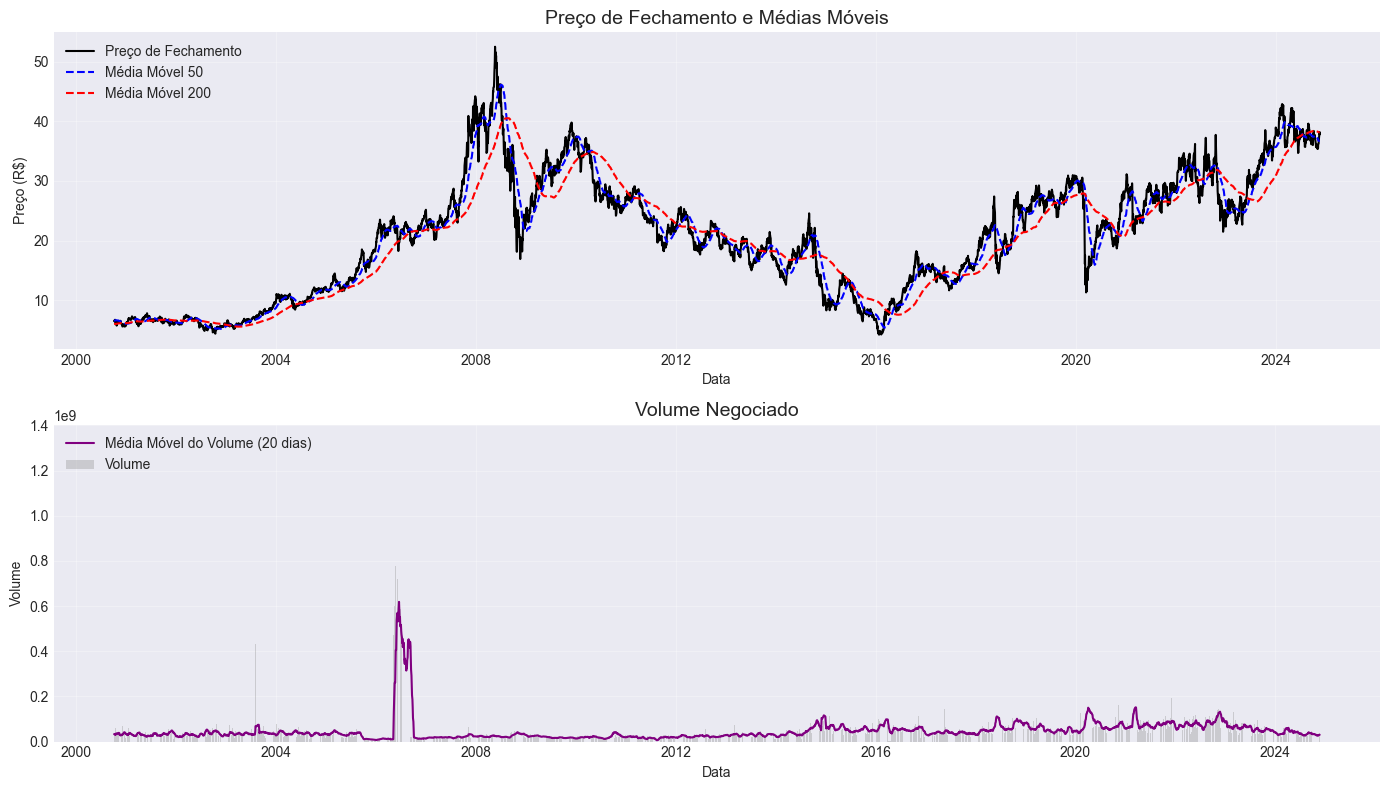

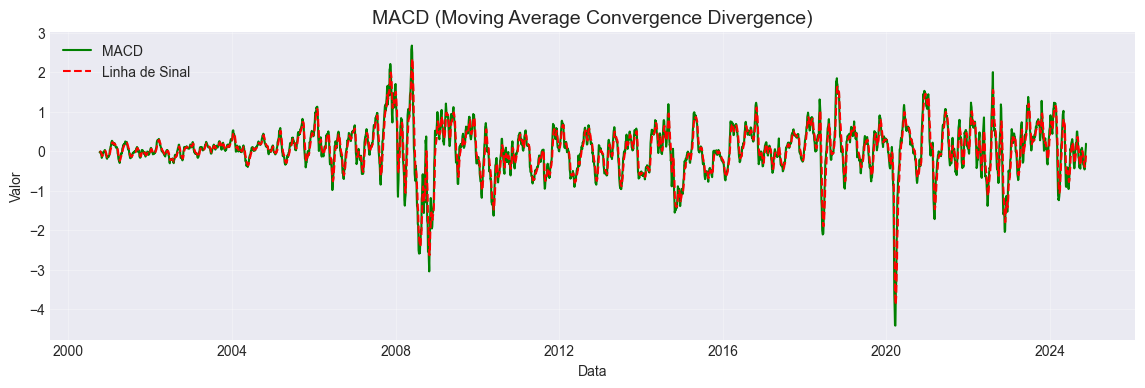

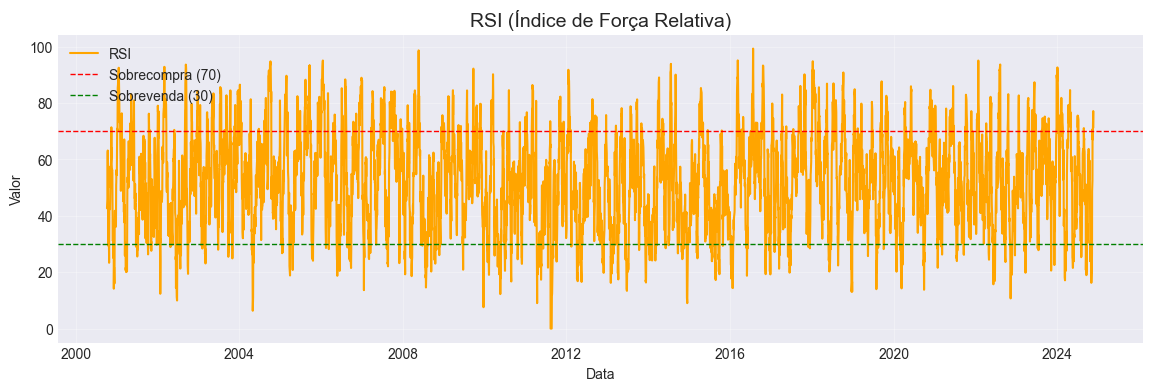

In [9]:
import matplotlib.pyplot as plt

# Garantir que o DataFrame não tenha valores ausentes para as colunas relevantes
df = df.dropna(subset=['MA_50', 'MA_200', 'Volume', 'Volume_MA_20', 'MACD', 'Signal', 'RSI'])

# Configuração do estilo dos gráficos
plt.style.use('seaborn-darkgrid')

# Plotando o preço de fechamento, médias móveis e volume
plt.figure(figsize=(14, 8))

# Preço de fechamento e médias móveis
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Preço de Fechamento', color='black', linewidth=1.5)
plt.plot(df.index, df['MA_50'], label='Média Móvel 50', color='blue', linestyle='--')
plt.plot(df.index, df['MA_200'], label='Média Móvel 200', color='red', linestyle='--')
plt.title('Preço de Fechamento e Médias Móveis', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)

# Volume e média de volume
plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], label='Volume', color='grey', alpha=0.3)
plt.plot(df.index, df['Volume_MA_20'], label='Média Móvel do Volume (20 dias)', color='purple', linewidth=1.5)
plt.title('Volume Negociado', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico do MACD
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['MACD'], label='MACD', color='green', linewidth=1.5)
plt.plot(df.index, df['Signal'], label='Linha de Sinal', color='red', linestyle='--', linewidth=1.5)
plt.title('MACD (Moving Average Convergence Divergence)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Gráfico do RSI
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['RSI'], label='RSI', color='orange', linewidth=1.5)
plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Sobrecompra (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1, label='Sobrevenda (30)')
plt.title('RSI (Índice de Força Relativa)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6052 entries, 2000-10-06 to 2024-11-19
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6052 non-null   float64
 1   High          6052 non-null   float64
 2   Low           6052 non-null   float64
 3   Close         6052 non-null   float64
 4   Adj Close     6052 non-null   float64
 5   Volume        6052 non-null   int64  
 6   MA_9          6052 non-null   float64
 7   MA_50         6052 non-null   float64
 8   MA_200        6052 non-null   float64
 9   EMA_12        6052 non-null   float64
 10  EMA_26        6052 non-null   float64
 11  MACD          6052 non-null   float64
 12  Signal        6052 non-null   float64
 13  RSI           6052 non-null   float64
 14  Volume_MA_20  6052 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 756.5 KB


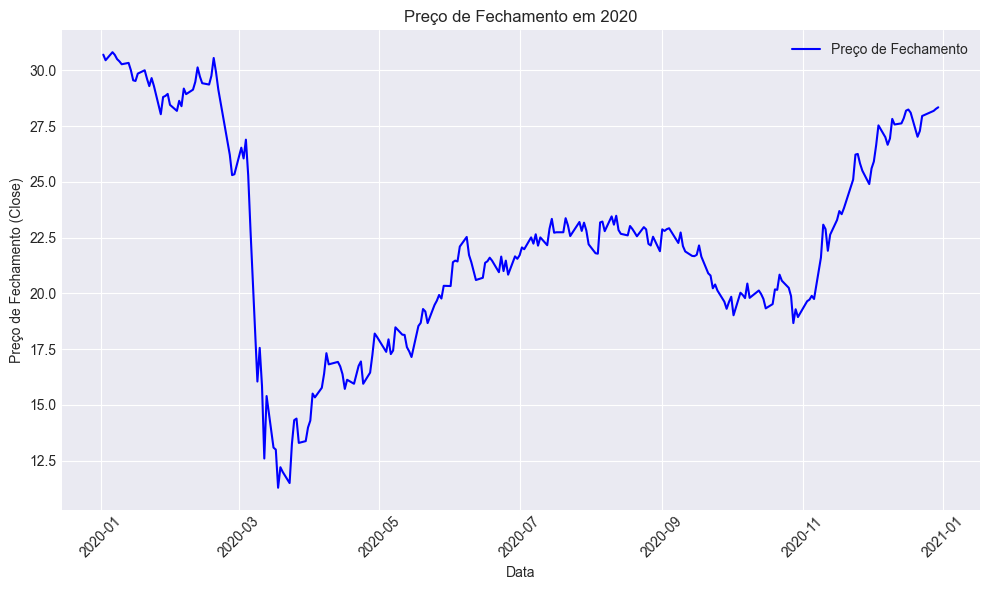

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que os dados já estão carregados no DataFrame 'df'
# Filtrando os dados para o ano de 2020
df_2020 = df[df.index.year == 2020]

# Plotando o gráfico do preço de fechamento (Close)
plt.figure(figsize=(10, 6))
plt.plot(df_2020.index, df_2020['Close'], label='Preço de Fechamento', color='blue')
plt.title('Preço de Fechamento em 2020')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (Close)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
petr4 = pd.read_csv("C:\\Users\\Guilherme\\Downloads\\petr4_google.csv")
petr4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, Mês to 2024-11
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Categoria: Todas as categorias  252 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [13]:

petr4 = petr4.rename(columns={'Categoria: Todas as categorias': 'Pesquisas Google'})

# Transformar o índice em uma coluna
petr4 = petr4.reset_index()

# Agora o índice será uma coluna chamada 'index', e a coluna foi renomeada
print(petr4)


       index Pesquisas Google
0        Mês  PETR4: (Brasil)
1    2004-01                0
2    2004-02                0
3    2004-03                0
4    2004-04                0
..       ...              ...
247  2024-07               22
248  2024-08               26
249  2024-09               21
250  2024-10               21
251  2024-11               19

[252 rows x 2 columns]


In [14]:
petr4 = petr4.drop(index=petr4.index[0])
petr4 = petr4.rename(columns={'index': 'Data'})

In [15]:
petr4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 1 to 251
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Data              251 non-null    object
 1   Pesquisas Google  251 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [16]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6052 non-null   datetime64[ns]
 1   Open          6052 non-null   float64       
 2   High          6052 non-null   float64       
 3   Low           6052 non-null   float64       
 4   Close         6052 non-null   float64       
 5   Adj Close     6052 non-null   float64       
 6   Volume        6052 non-null   int64         
 7   MA_9          6052 non-null   float64       
 8   MA_50         6052 non-null   float64       
 9   MA_200        6052 non-null   float64       
 10  EMA_12        6052 non-null   float64       
 11  EMA_26        6052 non-null   float64       
 12  MACD          6052 non-null   float64       
 13  Signal        6052 non-null   float64       
 14  RSI           6052 non-null   float64       
 15  Volume_MA_20  6052 non-null   float64 

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,EMA_12,EMA_26,MACD,Signal,RSI,Volume_MA_20
0,2000-10-06,6.475000,6.475000,6.475000,6.475000,1.521961,37315200,6.586250,6.523875,5.978256,6.595259,6.626698,-0.031439,-0.007601,42.645223,33072640.0
1,2000-10-09,6.487500,6.487500,6.487500,6.487500,1.524899,26342400,6.566806,6.536575,5.981319,6.578681,6.616387,-0.037706,-0.013622,45.222929,32436320.0
2,2000-10-10,6.606250,6.606250,6.606250,6.606250,1.552812,40163200,6.561944,6.554950,5.986600,6.582922,6.615636,-0.032714,-0.017441,45.911939,32711040.0
3,2000-10-11,6.625000,6.625000,6.625000,6.625000,1.557219,30969600,6.563333,6.571175,5.992255,6.589396,6.616330,-0.026934,-0.019339,56.716432,31982880.0
4,2000-10-12,6.625000,6.625000,6.625000,6.625000,1.557219,0,6.571667,6.587075,5.998005,6.594873,6.616972,-0.022099,-0.019891,62.295085,30003040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,36.073544,36.302665,-0.229122,-0.355439,70.683971,28917435.0
6048,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,36.197614,36.345431,-0.147817,-0.313915,67.013830,29469875.0
6049,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,36.362597,36.413918,-0.051321,-0.261396,68.542979,29874265.0
6050,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,36.645274,36.546220,0.099054,-0.189306,77.120782,30224430.0


In [18]:
# Converter a coluna 'Date' para o formato de ano e mês em df
df['Year_Month'] = df['Date'].dt.to_period('M')

# Converter a coluna 'Data' para o formato de ano e mês em petr4
petr4['Data'] = pd.to_datetime(petr4['Data'], format='%Y-%m').dt.to_period('M')

# Realizar o merge com base no mês e ano (colunas 'Year_Month' e 'Data')
df_merged = pd.merge(df, petr4, left_on='Year_Month', right_on='Data', how='left')

df_merged

,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,EMA_12,EMA_26,MACD,Signal,RSI,Volume_MA_20,Year_Month,Data,Pesquisas Google
0,2000-10-06,6.475000,6.475000,6.475000,6.475000,1.521961,37315200,6.586250,6.523875,5.978256,6.595259,6.626698,-0.031439,-0.007601,42.645223,33072640.0,2000-10,NaT,NaN
1,2000-10-09,6.487500,6.487500,6.487500,6.487500,1.524899,26342400,6.566806,6.536575,5.981319,6.578681,6.616387,-0.037706,-0.013622,45.222929,32436320.0,2000-10,NaT,NaN
2,2000-10-10,6.606250,6.606250,6.606250,6.606250,1.552812,40163200,6.561944,6.554950,5.986600,6.582922,6.615636,-0.032714,-0.017441,45.911939,32711040.0,2000-10,NaT,NaN
3,2000-10-11,6.625000,6.625000,6.625000,6.625000,1.557219,30969600,6.563333,6.571175,5.992255,6.589396,6.616330,-0.026934,-0.019339,56.716432,31982880.0,2000-10,NaT,NaN
4,2000-10-12,6.625000,6.625000,6.625000,6.625000,1.557219,0,6.571667,6.587075,5.998005,6.594873,6.616972,-0.022099,-0.019891,62.295085,30003040.0,2000-10,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,36.073544,36.302665,-0.229122,-0.355439,70.683971,28917435.0,2024-11,2024-11,19
6048,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,36.197614,36.345431,-0.147817,-0.313915,67.013830,29469875.0,2024-11,2024-11,19
6049,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,36.362597,36.413918,-0.051321,-0.261396,68.542979,29874265.0,2024-11,2024-11,19
6050,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,36.645274,36.546220,0.099054,-0.189306,77.120782,30224430.0,2024-11,2024-11,19


In [19]:
df_merged = df_merged.dropna()

In [20]:
df_merged

,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,EMA_12,EMA_26,MACD,Signal,RSI,Volume_MA_20,Year_Month,Data,Pesquisas Google
844,2004-01-01,9.550000,9.550000,9.550000,9.550000,2.244746,0,9.524306,8.681425,7.400550,9.419839,9.154449,0.265390,0.270229,69.639450,27836320.0,2004-01,2004-01,0
845,2004-01-02,9.550000,9.900000,9.550000,9.900000,2.327014,23606400,9.548056,8.720550,7.420988,9.493710,9.209675,0.284035,0.272991,79.529407,27020800.0,2004-01,2004-01,0
846,2004-01-05,9.986250,10.498750,9.981250,10.475000,2.462168,44755200,9.657778,8.770300,7.444363,9.644678,9.303403,0.341275,0.286647,84.333733,27774720.0,2004-01,2004-01,0
847,2004-01-06,10.626250,11.025000,10.462500,11.025000,2.591447,77187200,9.828611,8.828675,7.469738,9.857035,9.430928,0.426107,0.314539,86.490680,28050720.0,2004-01,2004-01,0
848,2004-01-07,11.000000,11.562500,10.900000,10.908750,2.564123,71033600,9.986528,8.886100,7.494100,10.018837,9.540396,0.478441,0.347320,81.259920,29420640.0,2004-01,2004-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,36.073544,36.302665,-0.229122,-0.355439,70.683971,28917435.0,2024-11,2024-11,19
6048,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,36.197614,36.345431,-0.147817,-0.313915,67.013830,29469875.0,2024-11,2024-11,19
6049,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,36.362597,36.413918,-0.051321,-0.261396,68.542979,29874265.0,2024-11,2024-11,19
6050,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,36.645274,36.546220,0.099054,-0.189306,77.120782,30224430.0,2024-11,2024-11,19


In [21]:
df = df_merged
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5208 entries, 844 to 6051
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5208 non-null   datetime64[ns]
 1   Open              5208 non-null   float64       
 2   High              5208 non-null   float64       
 3   Low               5208 non-null   float64       
 4   Close             5208 non-null   float64       
 5   Adj Close         5208 non-null   float64       
 6   Volume            5208 non-null   int64         
 7   MA_9              5208 non-null   float64       
 8   MA_50             5208 non-null   float64       
 9   MA_200            5208 non-null   float64       
 10  EMA_12            5208 non-null   float64       
 11  EMA_26            5208 non-null   float64       
 12  MACD              5208 non-null   float64       
 13  Signal            5208 non-null   float64       
 14  RSI               5208 non-

In [22]:
# Calcular a coluna que indica se o preço de fechamento aumentou na semana
df['Week_Change'] = (df['Close'] > df['Close'].shift(7)).astype(int)


df

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_27076\797346572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week_Change'] = (df['Close'] > df['Close'].shift(7)).astype(int)


,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,EMA_12,EMA_26,MACD,Signal,RSI,Volume_MA_20,Year_Month,Data,Pesquisas Google,Week_Change
844,2004-01-01,9.550000,9.550000,9.550000,9.550000,2.244746,0,9.524306,8.681425,7.400550,9.419839,9.154449,0.265390,0.270229,69.639450,27836320.0,2004-01,2004-01,0,0
845,2004-01-02,9.550000,9.900000,9.550000,9.900000,2.327014,23606400,9.548056,8.720550,7.420988,9.493710,9.209675,0.284035,0.272991,79.529407,27020800.0,2004-01,2004-01,0,0
846,2004-01-05,9.986250,10.498750,9.981250,10.475000,2.462168,44755200,9.657778,8.770300,7.444363,9.644678,9.303403,0.341275,0.286647,84.333733,27774720.0,2004-01,2004-01,0,0
847,2004-01-06,10.626250,11.025000,10.462500,11.025000,2.591447,77187200,9.828611,8.828675,7.469738,9.857035,9.430928,0.426107,0.314539,86.490680,28050720.0,2004-01,2004-01,0,0
848,2004-01-07,11.000000,11.562500,10.900000,10.908750,2.564123,71033600,9.986528,8.886100,7.494100,10.018837,9.540396,0.478441,0.347320,81.259920,29420640.0,2004-01,2004-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,36.073544,36.302665,-0.229122,-0.355439,70.683971,28917435.0,2024-11,2024-11,19,1
6048,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,36.197614,36.345431,-0.147817,-0.313915,67.013830,29469875.0,2024-11,2024-11,19,1
6049,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,36.362597,36.413918,-0.051321,-0.261396,68.542979,29874265.0,2024-11,2024-11,19,1
6050,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,36.645274,36.546220,0.099054,-0.189306,77.120782,30224430.0,2024-11,2024-11,19,1


In [23]:
df['Target'] = (df['Close'].shift(-30) > df['Close']).astype(int)
df

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_27076\2513087983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = (df['Close'].shift(-30) > df['Close']).astype(int)


,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,...,EMA_26,MACD,Signal,RSI,Volume_MA_20,Year_Month,Data,Pesquisas Google,Week_Change,Target
844,2004-01-01,9.550000,9.550000,9.550000,9.550000,2.244746,0,9.524306,8.681425,7.400550,...,9.154449,0.265390,0.270229,69.639450,27836320.0,2004-01,2004-01,0,0,1
845,2004-01-02,9.550000,9.900000,9.550000,9.900000,2.327014,23606400,9.548056,8.720550,7.420988,...,9.209675,0.284035,0.272991,79.529407,27020800.0,2004-01,2004-01,0,0,1
846,2004-01-05,9.986250,10.498750,9.981250,10.475000,2.462168,44755200,9.657778,8.770300,7.444363,...,9.303403,0.341275,0.286647,84.333733,27774720.0,2004-01,2004-01,0,0,1
847,2004-01-06,10.626250,11.025000,10.462500,11.025000,2.591447,77187200,9.828611,8.828675,7.469738,...,9.430928,0.426107,0.314539,86.490680,28050720.0,2004-01,2004-01,0,0,0
848,2004-01-07,11.000000,11.562500,10.900000,10.908750,2.564123,71033600,9.986528,8.886100,7.494100,...,9.540396,0.478441,0.347320,81.259920,29420640.0,2004-01,2004-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,...,36.302665,-0.229122,-0.355439,70.683971,28917435.0,2024-11,2024-11,19,1,0
6048,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,...,36.345431,-0.147817,-0.313915,67.013830,29469875.0,2024-11,2024-11,19,1,0
6049,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,...,36.413918,-0.051321,-0.261396,68.542979,29874265.0,2024-11,2024-11,19,1,0
6050,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,...,36.546220,0.099054,-0.189306,77.120782,30224430.0,2024-11,2024-11,19,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5208 entries, 844 to 6051
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5208 non-null   datetime64[ns]
 1   Open              5208 non-null   float64       
 2   High              5208 non-null   float64       
 3   Low               5208 non-null   float64       
 4   Close             5208 non-null   float64       
 5   Adj Close         5208 non-null   float64       
 6   Volume            5208 non-null   int64         
 7   MA_9              5208 non-null   float64       
 8   MA_50             5208 non-null   float64       
 9   MA_200            5208 non-null   float64       
 10  EMA_12            5208 non-null   float64       
 11  EMA_26            5208 non-null   float64       
 12  MACD              5208 non-null   float64       
 13  Signal            5208 non-null   float64       
 14  RSI               5208 non-

Accuracy: 0.4741


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_27076\4026333149.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pesquisas Google'] = le.fit_transform(df['Pesquisas Google'])


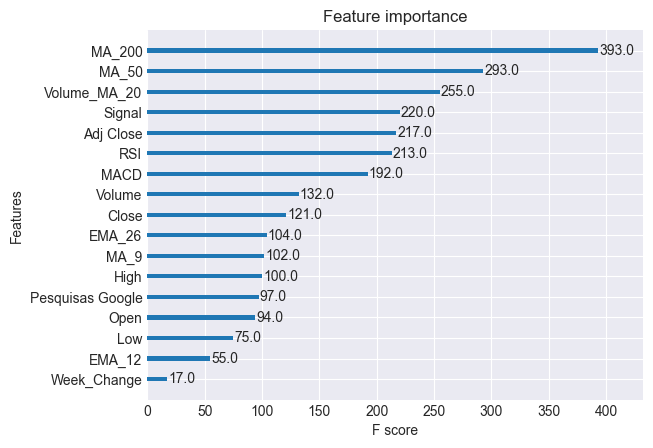

In [25]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Supondo que df seja o seu DataFrame com todas as colunas
# Garantir que a coluna 'Pesquisas Google' seja numérica, já que ela está como 'object'
# Usaremos LabelEncoder para codificar a coluna 'Pesquisas Google'
le = LabelEncoder()
df['Pesquisas Google'] = le.fit_transform(df['Pesquisas Google'])

# Definindo as variáveis independentes (X) e dependente (y)
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA_9', 'MA_50', 
        'MA_200', 'EMA_12', 'EMA_26', 'MACD', 'Signal', 'RSI', 'Volume_MA_20', 
        'Week_Change', 'Pesquisas Google']]

y = df['Target']

# Divisão dos dados temporais: utilizando 80% para treino e 20% para teste
# O parâmetro shuffle=False garante que a divisão será sequencial
train_size = int(0.8 * len(df))  # 80% para treino e 20% para teste
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Inicializando o modelo XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Treinamento do modelo
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Opcional: Exibir a importância das variáveis
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


In [26]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,...,EMA_26,MACD,Signal,RSI,Volume_MA_20,Year_Month,Data,Pesquisas Google,Week_Change,Target
844,2004-01-01,9.550000,9.550000,9.550000,9.550000,2.244746,0,9.524306,8.681425,7.400550,...,9.154449,0.265390,0.270229,69.639450,27836320.0,2004-01,2004-01,0,0,1
845,2004-01-02,9.550000,9.900000,9.550000,9.900000,2.327014,23606400,9.548056,8.720550,7.420988,...,9.209675,0.284035,0.272991,79.529407,27020800.0,2004-01,2004-01,0,0,1
846,2004-01-05,9.986250,10.498750,9.981250,10.475000,2.462168,44755200,9.657778,8.770300,7.444363,...,9.303403,0.341275,0.286647,84.333733,27774720.0,2004-01,2004-01,0,0,1
847,2004-01-06,10.626250,11.025000,10.462500,11.025000,2.591447,77187200,9.828611,8.828675,7.469738,...,9.430928,0.426107,0.314539,86.490680,28050720.0,2004-01,2004-01,0,0,0
848,2004-01-07,11.000000,11.562500,10.900000,10.908750,2.564123,71033600,9.986528,8.886100,7.494100,...,9.540396,0.478441,0.347320,81.259920,29420640.0,2004-01,2004-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,...,36.302665,-0.229122,-0.355439,70.683971,28917435.0,2024-11,2024-11,12,1,0
6048,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,...,36.345431,-0.147817,-0.313915,67.013830,29469875.0,2024-11,2024-11,12,1,0
6049,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,...,36.413918,-0.051321,-0.261396,68.542979,29874265.0,2024-11,2024-11,12,1,0
6050,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,...,36.546220,0.099054,-0.189306,77.120782,30224430.0,2024-11,2024-11,12,1,0


In [27]:
# implementar valor do dolar euro e indiice bovespa

[*********************100%%**********************]  1 of 1 completed


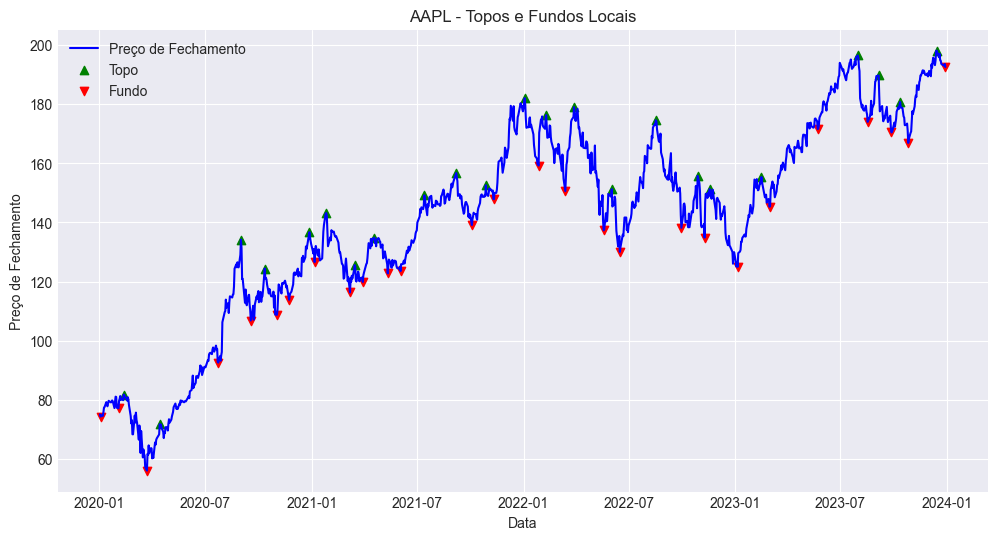

In [28]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'AAPL'
data = yf.download(symbol, start="2020-01-01", end="2024-01-01")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')
plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


In [29]:
data

,Open,High,Low,Close,Adj Close,Volume,local_max,local_min
Date,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.796021,135480400,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088287,146322800,NaN,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662697,118387200,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320976,108872000,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484352,132079200,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.656174,37122800,NaN,NaN
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.108856,28919300,NaN,NaN
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.208374,48087700,NaN,NaN


[*********************100%%**********************]  1 of 1 completed


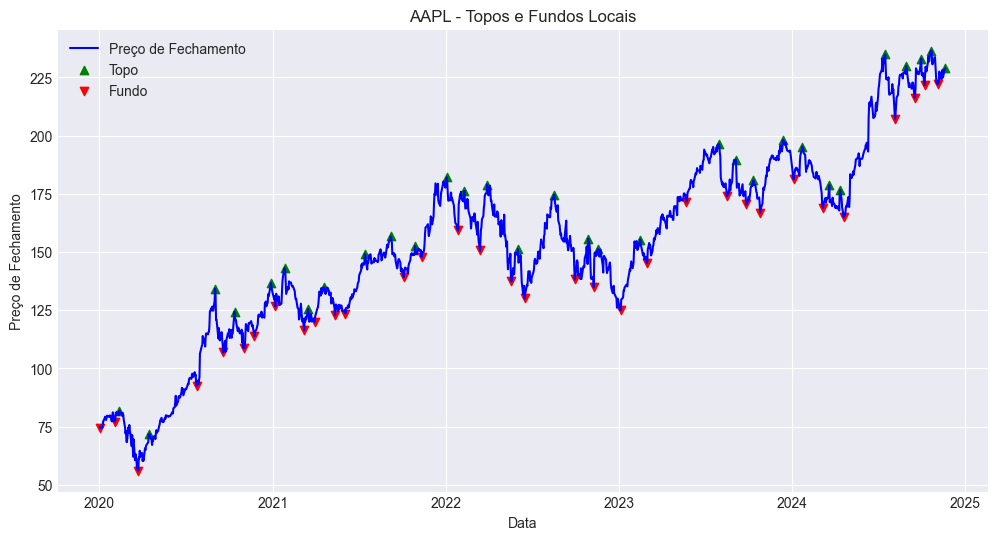

In [30]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'AAPL'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')
plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

In [31]:
data

,Open,High,Low,Close,Adj Close,Volume,local_max,local_min
Date,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.796021,135480400,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088287,146322800,NaN,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662689,118387200,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320969,108872000,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484360,132079200,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-11-14,225.020004,228.869995,225.000000,228.220001,228.220001,44923900,NaN,NaN
2024-11-15,226.399994,226.919998,224.270004,225.000000,225.000000,47923700,NaN,NaN
2024-11-18,225.250000,229.740005,225.169998,228.020004,228.020004,44686000,NaN,NaN


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2020-01-02 to 2024-11-20
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1231 non-null   float64
 1   High       1231 non-null   float64
 2   Low        1231 non-null   float64
 3   Close      1231 non-null   float64
 4   Adj Close  1231 non-null   float64
 5   Volume     1231 non-null   int64  
 6   local_max  31 non-null     float64
 7   local_min  33 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 86.6 KB


[*********************100%%**********************]  1 of 1 completed


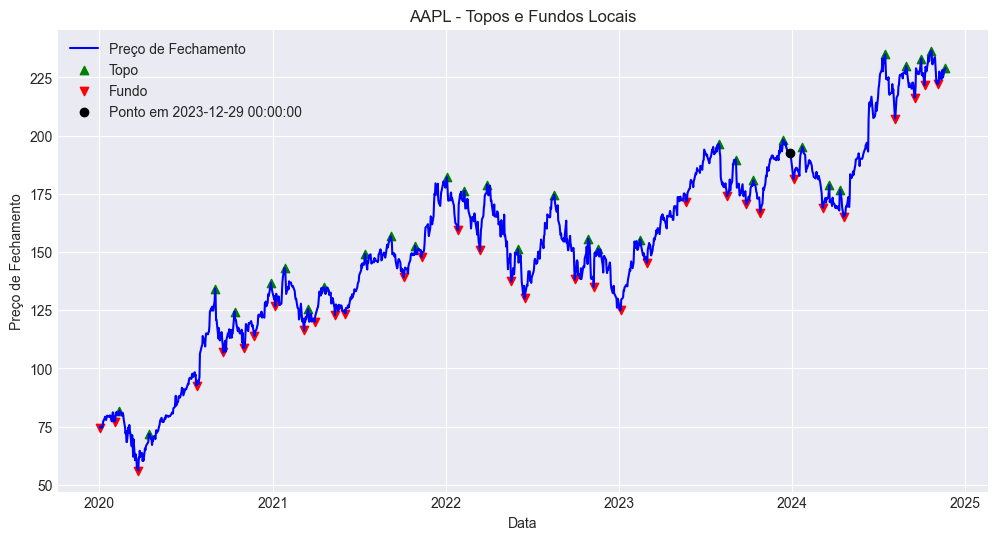

In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'AAPL'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
if highlight_date:
    plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


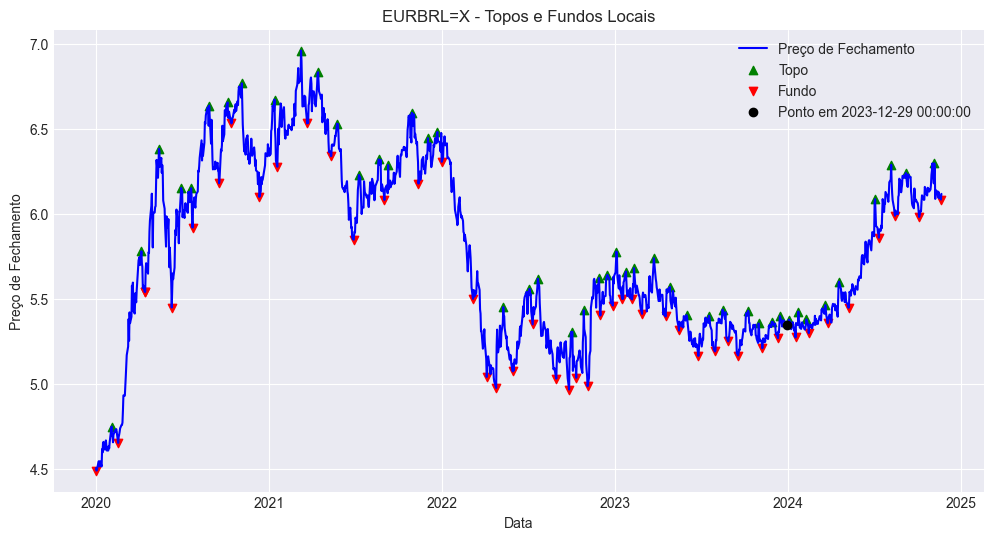

In [34]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'EURBRL=X'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
if highlight_date:
    plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


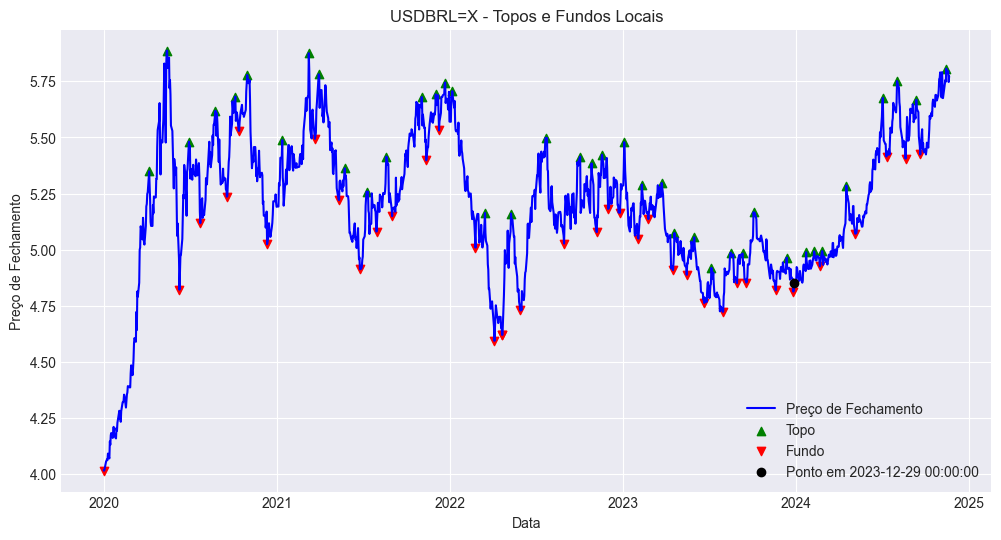

In [35]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'USDBRL=X'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
if highlight_date:
    plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


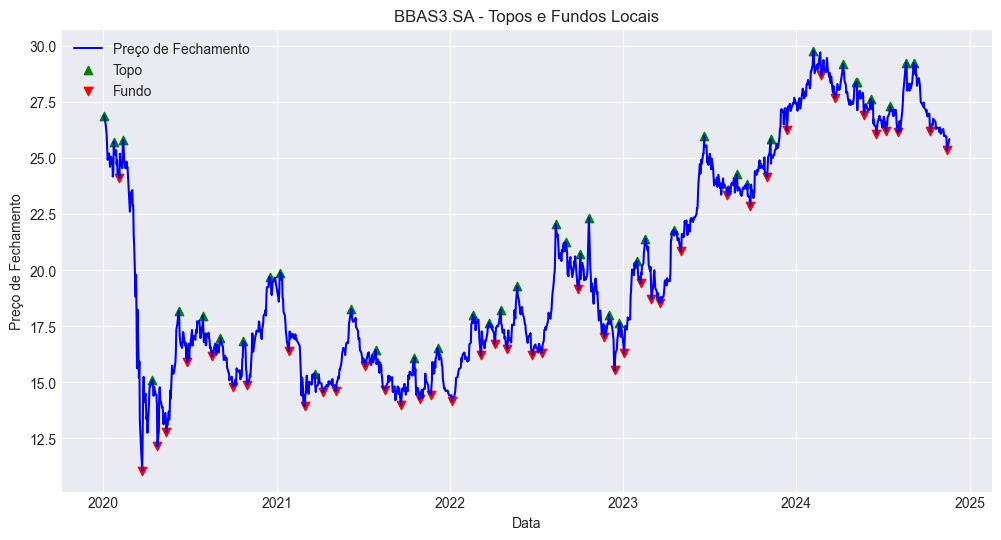

In [36]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'BBAS3.SA'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
if highlight_date:
    plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


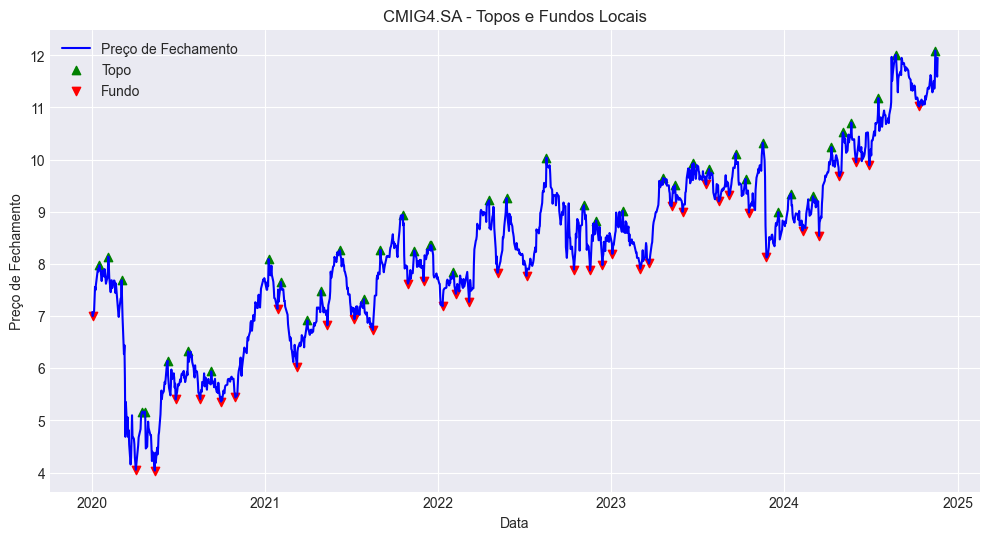

In [37]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'CMIG4.SA'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
if highlight_date:
    plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


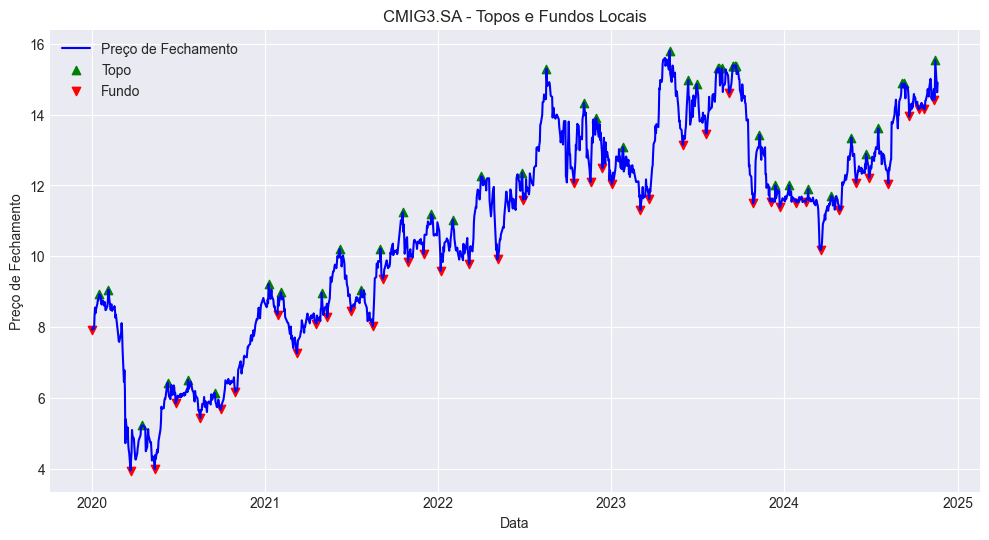

In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'CMIG3.SA'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
if highlight_date:
    plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


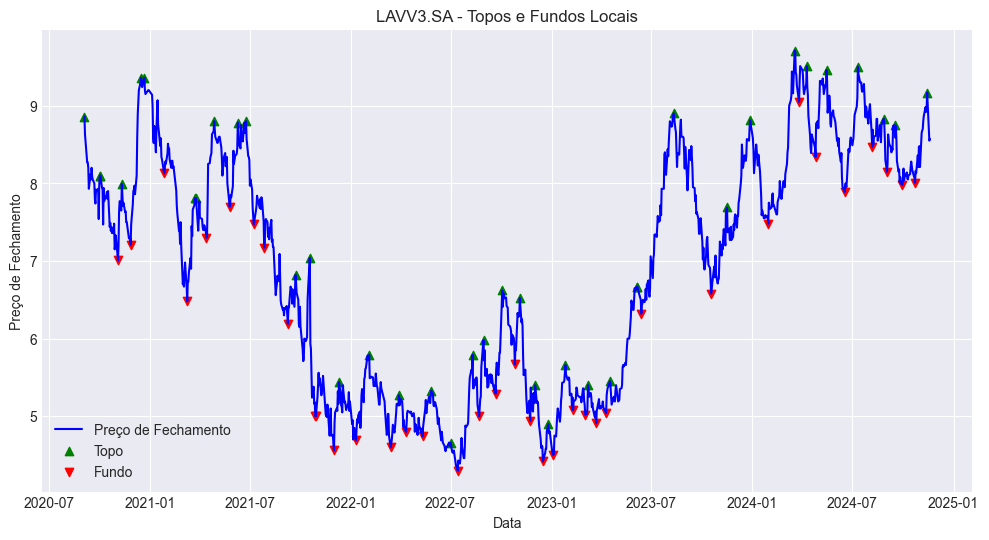

In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'LAVV3.SA'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
if highlight_date:
    plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


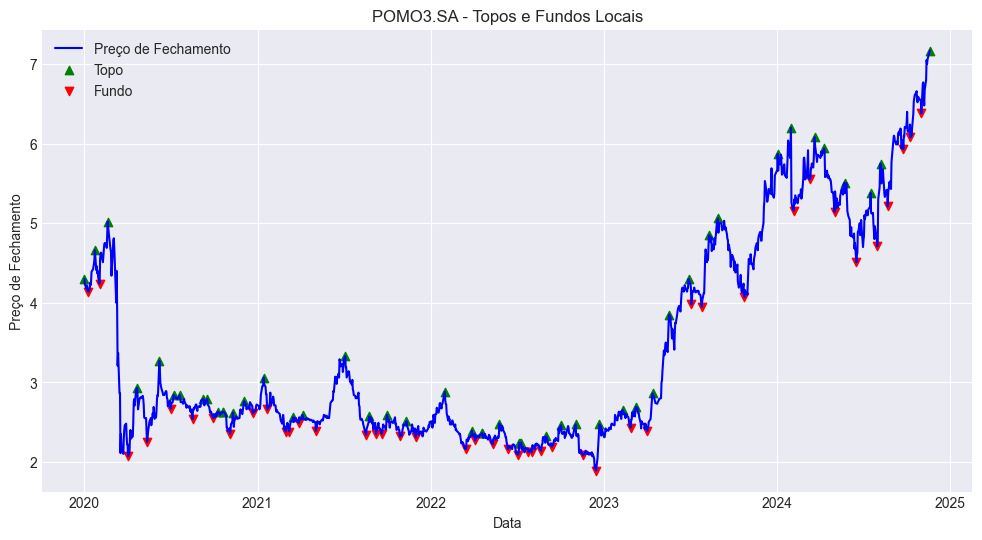

In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'POMO3.SA'
data = yf.download(symbol, start="2020-01-01", end="2024-11-21")

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 10  # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
if highlight_date:
    plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


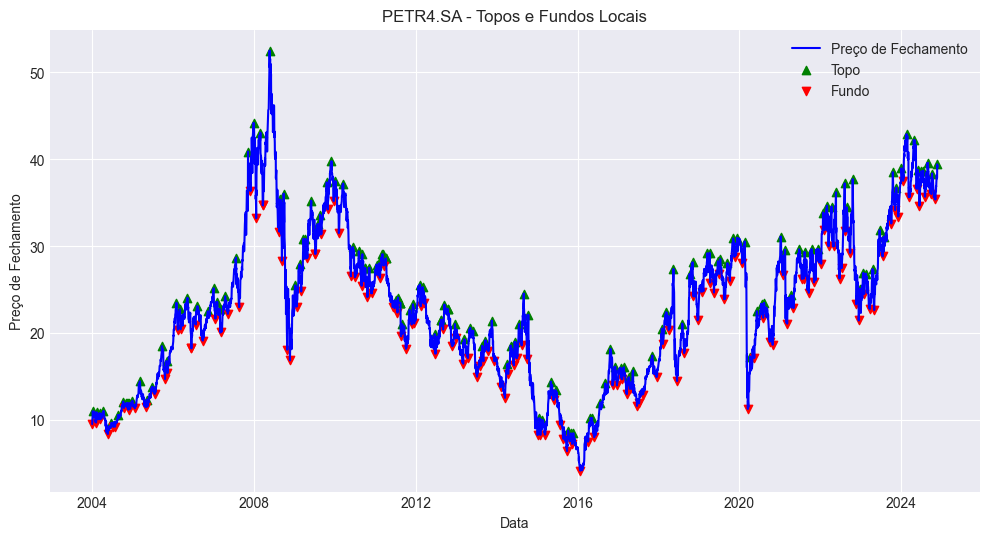

In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Baixar dados da ação (exemplo com AAPL)
symbol = 'PETR4.SA'
data = yf.download(symbol, start="2004-01-01", end="2024-11-27", interval='1d')

# Detectar topos e fundos locais
# Vamos usar o preço de fechamento para encontrar os extremos locais
window = 11 # Número de dias para olhar para trás e para frente

# Encontrando os máximos locais (topos) e mínimos locais (fundos)
data['local_max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=window)[0]]['Close']
data['local_min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=window)[0]]['Close']

# Definir a data do ponto a ser destacado
#highlight_date = pd.Timestamp('2023-12-29')

# Verificar se a data está no índice
if highlight_date in data.index:
    highlight_price = data.loc[highlight_date, 'Close']
else:
    highlight_date = None
    highlight_price = None

# Plotando os dados com os topos e fundos detectados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(data.index, data['local_max'], marker='^', color='green', label='Topo')
plt.scatter(data.index, data['local_min'], marker='v', color='red', label='Fundo')

# Adicionando o ponto preto para o dia 2023-12-29
#if highlight_date:
    #plt.scatter(highlight_date, highlight_price, color='black', zorder=5, label=f'Ponto em {highlight_date}')

plt.title(f'{symbol} - Topos e Fundos Locais')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5212 entries, 2004-01-01 to 2024-11-26
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5212 non-null   float64
 1   High       5212 non-null   float64
 2   Low        5212 non-null   float64
 3   Close      5212 non-null   float64
 4   Adj Close  5212 non-null   float64
 5   Volume     5212 non-null   int64  
 6   local_max  153 non-null    float64
 7   local_min  144 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 495.5 KB


In [43]:
import pandas as pd
import numpy as np

# Criar a coluna `canal`
def calcular_canal(row, last_max, last_min):
    if last_max is not None and last_min is not None:
        return last_max - last_min
    return np.nan

# Inicializar variáveis para armazenar os últimos valores de local_max e local_min
last_max = None
last_min = None

# Iterar pelas linhas do DataFrame
canal = []
for idx, row in data.iterrows():
    # Atualizar os últimos valores não nulos de local_max e local_min
    if not pd.isna(row['local_max']):
        last_max = row['local_max']
    if not pd.isna(row['local_min']):
        last_min = row['local_min']
    
    # Calcular o valor do canal para a linha atual
    canal.append(calcular_canal(row, last_max, last_min))

# Adicionar a nova coluna ao DataFrame
data['canal'] = canal


In [44]:
data['local_max'] = data['local_max'].ffill()
data['local_min'] = data['local_min'].ffill()
data

,Open,High,Low,Close,Adj Close,Volume,local_max,local_min,canal
Date,,,,,,,,,
2004-01-01,9.550000,9.550000,9.550000,9.550000,2.244746,0,NaN,9.550000,NaN
2004-01-02,9.550000,9.900000,9.550000,9.900000,2.327014,23606400,NaN,9.550000,NaN
2004-01-05,9.986250,10.498750,9.981250,10.475000,2.462169,44755200,NaN,9.550000,NaN
2004-01-06,10.626250,11.025000,10.462500,11.025000,2.591448,77187200,11.025000,9.550000,1.474999
2004-01-07,11.000000,11.562500,10.900000,10.908750,2.564122,71033600,11.025000,9.550000,1.474999
...,...,...,...,...,...,...,...,...,...
2024-11-19,38.099998,38.299999,37.650002,37.799999,37.799999,26002700,38.369999,35.389999,2.980000
2024-11-21,37.970001,38.130001,37.549999,37.910000,37.910000,36048400,38.369999,35.389999,2.980000
2024-11-22,38.709999,39.830002,38.470001,39.419998,39.419998,85234900,39.419998,35.389999,4.029999


In [45]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,...,EMA_26,MACD,Signal,RSI,Volume_MA_20,Year_Month,Data,Pesquisas Google,Week_Change,Target
844,2004-01-01,9.550000,9.550000,9.550000,9.550000,2.244746,0,9.524306,8.681425,7.400550,...,9.154449,0.265390,0.270229,69.639450,27836320.0,2004-01,2004-01,0,0,1
845,2004-01-02,9.550000,9.900000,9.550000,9.900000,2.327014,23606400,9.548056,8.720550,7.420988,...,9.209675,0.284035,0.272991,79.529407,27020800.0,2004-01,2004-01,0,0,1
846,2004-01-05,9.986250,10.498750,9.981250,10.475000,2.462168,44755200,9.657778,8.770300,7.444363,...,9.303403,0.341275,0.286647,84.333733,27774720.0,2004-01,2004-01,0,0,1
847,2004-01-06,10.626250,11.025000,10.462500,11.025000,2.591447,77187200,9.828611,8.828675,7.469738,...,9.430928,0.426107,0.314539,86.490680,28050720.0,2004-01,2004-01,0,0,0
848,2004-01-07,11.000000,11.562500,10.900000,10.908750,2.564123,71033600,9.986528,8.886100,7.494100,...,9.540396,0.478441,0.347320,81.259920,29420640.0,2004-01,2004-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,...,36.302665,-0.229122,-0.355439,70.683971,28917435.0,2024-11,2024-11,12,1,0
6048,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,...,36.345431,-0.147817,-0.313915,67.013830,29469875.0,2024-11,2024-11,12,1,0
6049,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,...,36.413918,-0.051321,-0.261396,68.542979,29874265.0,2024-11,2024-11,12,1,0
6050,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,...,36.546220,0.099054,-0.189306,77.120782,30224430.0,2024-11,2024-11,12,1,0


In [46]:
data = data.reset_index()  # O índice original vira uma coluna chamada 'index'

# 2. Renomear a coluna de data no df_source para 'Date' para corresponder ao df_target
data.rename(columns={'index': 'Date'}, inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume,local_max,local_min,canal
0,2004-01-01,9.550000,9.550000,9.550000,9.550000,2.244746,0,NaN,9.550000,NaN
1,2004-01-02,9.550000,9.900000,9.550000,9.900000,2.327014,23606400,NaN,9.550000,NaN
2,2004-01-05,9.986250,10.498750,9.981250,10.475000,2.462169,44755200,NaN,9.550000,NaN
3,2004-01-06,10.626250,11.025000,10.462500,11.025000,2.591448,77187200,11.025000,9.550000,1.474999
4,2004-01-07,11.000000,11.562500,10.900000,10.908750,2.564122,71033600,11.025000,9.550000,1.474999
...,...,...,...,...,...,...,...,...,...,...
5207,2024-11-19,38.099998,38.299999,37.650002,37.799999,37.799999,26002700,38.369999,35.389999,2.980000
5208,2024-11-21,37.970001,38.130001,37.549999,37.910000,37.910000,36048400,38.369999,35.389999,2.980000
5209,2024-11-22,38.709999,39.830002,38.470001,39.419998,39.419998,85234900,39.419998,35.389999,4.029999
5210,2024-11-25,39.380001,39.860001,39.150002,39.180000,39.180000,41119500,39.419998,35.389999,4.029999


In [47]:


# 3. Mesclar os DataFrames pelo campo de data
df = pd.merge(
    df, 
    data[['Date', 'local_max', 'local_min', 'canal']], 
    on='Date', 
    how='left'  # Usar 'left' para manter todas as linhas de df_target
)
df
# O df_target agora possui as colunas local_max, local_min e canal.


,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,...,RSI,Volume_MA_20,Year_Month,Data,Pesquisas Google,Week_Change,Target,local_max,local_min,canal
0,2004-01-01,9.550000,9.550000,9.550000,9.550000,2.244746,0,9.524306,8.681425,7.400550,...,69.639450,27836320.0,2004-01,2004-01,0,0,1,NaN,9.550000,NaN
1,2004-01-02,9.550000,9.900000,9.550000,9.900000,2.327014,23606400,9.548056,8.720550,7.420988,...,79.529407,27020800.0,2004-01,2004-01,0,0,1,NaN,9.550000,NaN
2,2004-01-05,9.986250,10.498750,9.981250,10.475000,2.462168,44755200,9.657778,8.770300,7.444363,...,84.333733,27774720.0,2004-01,2004-01,0,0,1,NaN,9.550000,NaN
3,2004-01-06,10.626250,11.025000,10.462500,11.025000,2.591447,77187200,9.828611,8.828675,7.469738,...,86.490680,28050720.0,2004-01,2004-01,0,0,0,11.025000,9.550000,1.474999
4,2004-01-07,11.000000,11.562500,10.900000,10.908750,2.564123,71033600,9.986528,8.886100,7.494100,...,81.259920,29420640.0,2004-01,2004-01,0,0,0,11.025000,9.550000,1.474999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,...,70.683971,28917435.0,2024-11,2024-11,12,1,0,38.369999,35.389999,2.980000
5204,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,...,67.013830,29469875.0,2024-11,2024-11,12,1,0,38.369999,35.389999,2.980000
5205,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,...,68.542979,29874265.0,2024-11,2024-11,12,1,0,38.369999,35.389999,2.980000
5206,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,...,77.120782,30224430.0,2024-11,2024-11,12,1,0,38.369999,35.389999,2.980000


In [63]:

import pandas as pd
import numpy as np

# Supondo que você já tenha um DataFrame chamado df com as colunas básicas
# As colunas devem incluir: 'Close', 'MA_50', 'MA_200', 'Volume', 'RSI', 'Signal'

# 1. Diferença e Razão entre Médias Móveis
df['MA_Diff'] = df['MA_50'] - df['MA_200']  # Diferença entre médias móveis
df['MA_Ratio'] = df['MA_50'] / df['MA_200']  # Razão entre médias móveis

# 2. Delta RSI (variação do RSI)
df['RSI_Change'] = df['RSI'].diff()  # Mudança no RSI em relação ao período anterior

# 3. Variação no Volume
df['Volume_Change'] = df['Volume'].pct_change()  # Mudança percentual no volume

# 4. Volume ponderado pelo preço de fechamento
df['Volume_Weighted_Close'] = df['Volume'] * df['Close']

# 5. Retornos Logarítmicos
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))  # Retorno logarítmico

# 6. Volatilidade em janelas móveis (usando janela de 20 períodos como exemplo)
df['Volatility'] = df['Close'].rolling(window=20).std()  # Desvio padrão do preço de fechamento

# 7. Interações entre variáveis
df['Signal_RSI'] = df['Signal'] * df['RSI']  # Interação entre Signal e RSI
df['Close_MA_Interaction'] = df['Close'] * df['MA_50']  # Interação entre preço e média móvel

# 8. Cruzamento de Médias Móveis
df['Golden_Cross'] = (df['MA_50'] > df['MA_200']).astype(int)  # 1 se MA_50 > MA_200
df['Death_Cross'] = (df['MA_50'] < df['MA_200']).astype(int)  # 1 se MA_50 < MA_200

# 9. Direção da tendência
df['Trend_Direction'] = np.where(df['Close'] > df['Close'].shift(1), 1, -1)  # 1 para alta, -1 para baixa

# 10. Recursos temporais (se for uma série temporal com coluna de data chamada 'Date')
if 'Date' in df.columns:
    df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.dayofweek  # Dia da semana (0=segunda-feira)
    df['Month'] = pd.to_datetime(df['Date']).dt.month  # Mês do ano







df = df.dropna()

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_27076\1455684315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_Diff'] = df['MA_50'] - df['MA_200']  # Diferença entre médias móveis
C:\Users\Guilherme\AppData\Local\Temp\ipykernel_27076\1455684315.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_Ratio'] = df['MA_50'] / df['MA_200']  # Razão entre médias móveis
C:\Users\Guilherme\AppData\Local\Temp\ipykernel_27076\1455684315.py:12: SettingWithCopyWarning: 
A value is trying to be set on a

In [65]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA_9',
       'MA_50', 'MA_200', 'EMA_12', 'EMA_26', 'MACD', 'Signal', 'RSI',
       'Volume_MA_20', 'Year_Month', 'Data', 'Pesquisas Google', 'Week_Change',
       'Target', 'local_max', 'local_min', 'canal', 'MA_Diff', 'MA_Ratio',
       'RSI_Change', 'Volume_Change', 'Volume_Weighted_Close', 'Log_Returns',
       'Volatility', 'Signal_RSI', 'Close_MA_Interaction', 'Golden_Cross',
       'Death_Cross', 'Trend_Direction', 'Day_of_Week', 'Month'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5163 entries, 22 to 5207
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5163 non-null   datetime64[ns]
 1   Open                   5163 non-null   float64       
 2   High                   5163 non-null   float64       
 3   Low                    5163 non-null   float64       
 4   Close                  5163 non-null   float64       
 5   Adj Close              5163 non-null   float64       
 6   Volume                 5163 non-null   int64         
 7   MA_9                   5163 non-null   float64       
 8   MA_50                  5163 non-null   float64       
 9   MA_200                 5163 non-null   float64       
 10  EMA_12                 5163 non-null   float64       
 11  EMA_26                 5163 non-null   float64       
 12  MACD                   5163 non-null   float64       
 13  Signal 

Accuracy (antes da seleção de features): 0.4947


<Figure size 1000x800 with 0 Axes>

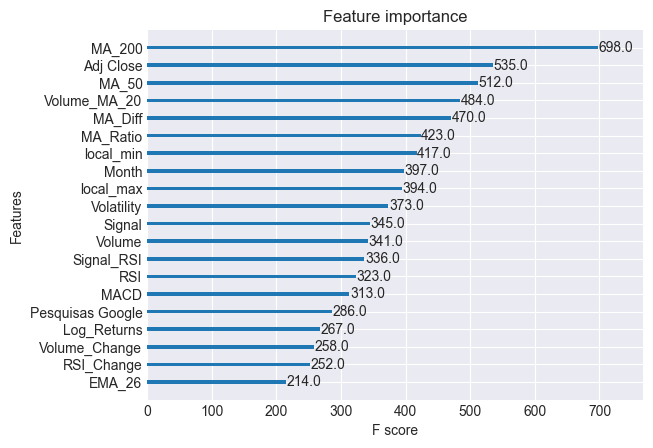

Importância das features:
                  Feature  Importance
9                 EMA_12    0.067450
25  Close_MA_Interaction    0.063419
17             local_min    0.058518
30                 Month    0.050846
31      Pesquisas Google    0.050653
8                 MA_200    0.047312
16             local_max    0.044437
7                  MA_50    0.042012
14          Volume_MA_20    0.038650
4              Adj Close    0.038549
2                    Low    0.038387
19              MA_Ratio    0.037249
18               MA_Diff    0.036050
10                EMA_26    0.034772
3                  Close    0.034085
26          Golden_Cross    0.031799
1                   High    0.031152
0                   Open    0.031140
6                   MA_9    0.025740
24            Signal_RSI    0.023573
15           Week_Change    0.023196
12                Signal    0.022649
11                  MACD    0.022160
23            Volatility    0.021943
5                 Volume    0.018085
13         

<Figure size 1000x800 with 0 Axes>

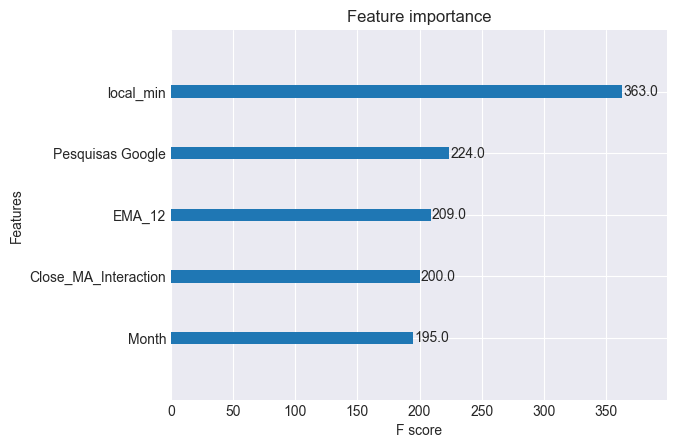

In [85]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Garantir que a coluna 'Pesquisas Google' seja numérica
le = LabelEncoder()
df['Pesquisas Google'] = le.fit_transform(df['Pesquisas Google'])

# Definindo as variáveis independentes (X) e dependente (y)
X = df[[  # Inclui todas as features inicialmente
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
    'MA_9', 'MA_50', 'MA_200', 'EMA_12', 'EMA_26', 'MACD', 'Signal', 'RSI',
    'Volume_MA_20', 'Week_Change', 'local_max', 'local_min', 'MA_Diff',
    'MA_Ratio', 'RSI_Change', 'Volume_Change', 'Log_Returns', 'Volatility',
    'Signal_RSI', 'Close_MA_Interaction', 'Golden_Cross', 'Death_Cross',
    'Trend_Direction', 'Day_of_Week', 'Month', 'Pesquisas Google'
]]
y = df['Target']

# Divisão dos dados temporais: utilizando 80% para treino e 20% para teste
train_size = int(0.8 * len(df))  # 80% para treino e 20% para teste
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Substituir valores NaN e infinitos em X_train e X_test
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)

# Inicializando o modelo XGBoost com hiperparâmetros ajustados
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5
)

# Treinamento do modelo inicial
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação inicial do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (antes da seleção de features): {accuracy:.4f}')

# Exibir a importância das variáveis
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=20)
plt.show()

# Criar DataFrame com importância das variáveis
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Exibir as features mais importantes
print("Importância das features:\n", feature_importances)

# Selecionar apenas as features com importância acima de um limiar
threshold = 0.05  # Ajuste o limiar conforme necessário
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

print(f"Features selecionadas: {selected_features.tolist()}")

# Reduzindo os datasets para as features selecionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Aplicando validação cruzada para encontrar os melhores parâmetros
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_grid=param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5),
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_selected, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Treinando o modelo final
best_model.fit(X_train_selected, y_train)

# Previsões com o modelo final
y_pred_selected = best_model.predict(X_test_selected)

# Avaliação do modelo após ajuste
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy (após ajuste e seleção de features): {accuracy_selected:.4f}')

# Exibir a nova importância das variáveis
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model, max_num_features=20)
plt.show()


In [86]:
last_prediction = y_pred_selected[-1]
last_prediction

0

In [87]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA_9,MA_50,MA_200,...,Volume_Weighted_Close,Log_Returns,Volatility,Signal_RSI,Close_MA_Interaction,Golden_Cross,Death_Cross,Trend_Direction,Day_of_Week,Month
22,2004-02-02,9.687500,9.837500,9.512500,9.800000,2.303509,51939200,10.458889,9.710775,7.912956,...,5.090042e+08,0.001404,0.354711,8.845809,95.165597,1,0,1,0,2
23,2004-02-03,9.973750,10.075000,9.851250,10.000000,2.350519,84656000,10.371250,9.737075,7.932313,...,8.465600e+08,0.020203,0.366299,9.568027,97.370750,1,0,1,1,2
24,2004-02-04,10.175000,10.246250,9.768750,9.786250,2.300277,39209600,10.280417,9.767750,7.950063,...,3.837150e+08,-0.021607,0.395572,7.840937,95.589645,1,0,-1,2,2
25,2004-02-05,9.875000,10.025000,9.631250,9.725000,2.285881,49721600,10.178889,9.795625,7.967506,...,4.835426e+08,-0.006278,0.423722,5.362059,95.262457,1,0,-1,3,2
26,2004-02-06,9.723750,10.202500,9.541250,10.202500,2.398117,47577600,10.106945,9.832475,7.986831,...,4.854105e+08,0.047933,0.422125,4.758035,100.315830,1,0,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,2024-11-12,36.360001,37.110001,36.340000,36.930000,36.930000,39412300,35.832222,36.751600,38.163950,...,1.455496e+09,0.018585,0.547159,-25.123866,1357.236598,0,1,1,1,11
5204,2024-11-13,36.950001,37.070000,36.529999,36.880001,36.880001,34090000,35.940000,36.718400,38.144550,...,1.257239e+09,-0.001355,0.515138,-21.036637,1354.174630,0,1,-1,2,11
5205,2024-11-14,36.919998,37.330002,36.860001,37.270000,37.270000,30262100,36.145556,36.697800,38.123050,...,1.127868e+09,0.010519,0.549885,-17.916867,1367.727022,0,1,1,3,11
5206,2024-11-18,37.200001,38.299999,37.200001,38.200001,38.200001,39004100,36.445556,36.710800,38.108900,...,1.489957e+09,0.024647,0.710753,-14.599430,1402.352589,0,1,1,0,11
